In [15]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import math
#%%
data=np.loadtxt("eddington.txt",skiprows=1).T   #inputing the file here
#print(data)
x=data[0]
y=data[1]
Ex=data[2]
Ey=data[3]
Dx=data[4]
Dy=data[5]

a0,b0,c0,d0,e0,f0,alpha0 = np.random.normal(0,1,7)
da=np.loadtxt("eddington.txt",skiprows=1).T
x = da[0]
y = da[1]
Ex = da[2]
Ey = da[3]
Dx = da[4]
Dy = da[5]
#%%
def dx(a,b,c,x,y,Ex,alpha):  
    return a*x + b*y + c + alpha*Ex
def dy(d,e,f,x,y,Ey,alpha):
    return d*x + e*y + f + alpha*Ey
def loglikelihood(a,b,c,d,e,f,alpha,x,y,Ex,Ey):    
    s = 0.05
    s_1 = 1/(math.sqrt(2*math.pi)*s)
    g = 0
    for i in range(7):
        L = (-0.5*((Dx[i] - dx(a,b,c,x[i],y[i],Ex[i],alpha))**2)/s**2) + (-0.5*((Dy[i] - dy(d,e,f,x[i],y[i],Ey[i],alpha))**2)/s**2) + np.log(1/(2*np.pi*s**2))
        g = g + L 
    return g   
#%%
def M_chain(steps,sigma):
    
    a_vals = np.zeros(steps)
    b_vals = np.zeros(steps)
    c_vals = np.zeros(steps)
    d_vals = np.zeros(steps)
    e_vals = np.zeros(steps)
    f_vals = np.zeros(steps)
    alpha_vals=np.zeros(steps)
    burn_in = int(0.1*steps)
    
    
    
    a_vals[0] = a0
    b_vals[0] = b0
    c_vals[0] = c0
    d_vals[0] = d0
    e_vals[0] = e0
    f_vals[0] = f0
    alpha_vals[0] = alpha0 
    acceptance=0

    for i in range(1,steps):
        
        a = np.random.normal(a_vals[i-1],sigma)
        b = np.random.normal(b_vals[i-1],sigma)
        c = np.random.normal(c_vals[i-1],sigma)
        d = np.random.normal(d_vals[i-1],sigma)
        e = np.random.normal(e_vals[i-1],sigma)
        f = np.random.normal(f_vals[i-1],sigma)
        alpha = np.random.normal(alpha_vals[i-1],sigma)
        
        p1=loglikelihood(a_vals[i-1],b_vals[i-1],c_vals[i-1],d_vals[i-1],e_vals[i-1],f_vals[i-1],alpha_vals[i-1],x,y,Ex,Ey)
        
        if alpha<0:
            p2 = -np.inf
        else:
            p2 = loglikelihood(a,b,c,d,e,f,alpha,x,y,Ex,Ey)
    
       
    
        accep_prob  = min(1,np.exp(p2-p1))
        u = np.random.rand(1)[0]
        if u<accep_prob:
            a_vals[i],b_vals[i],c_vals[i],d_vals[i],e_vals[i],f_vals[i],alpha_vals[i]=a,b,c,d,e,f,alpha
            acceptance=acceptance+1
        else:
            a_vals[i],b_vals[i],c_vals[i],d_vals[i],e_vals[i],f_vals[i],alpha_vals[i] = a_vals[i-1],b_vals[i-1],c_vals[i-1],d_vals[i-1],e_vals[i-1],f_vals[i-1],alpha_vals[i-1]
    plt.hist(alpha_vals[burn_in:],bins=50)
    plt.xlabel('alpha_value', fontsize='15')
    plt.ylabel('Frequency', fontsize='15')
    return alpha_vals[burn_in:]
    #%%
    

[0.20400659 0.20400659 0.20400659 ... 0.1154559  0.10909766 0.10909766]


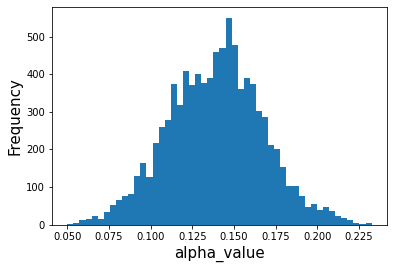

In [16]:
M=M_chain(10000,0.01)
print(M)


In [17]:
theta=19.8*np.mean(M)
print("The mean value of alpha parameter is", np.mean(M))
print("The mean value of theta is",theta)

The mean value of alpha parameter is 0.138943990309901
The mean value of theta is 2.75109100813604


In [18]:
#